<div dir=rtl>

## מעבדה לפיסיקה 2

</center>

<h1><center>התנגדות</center></h1>

<div dir=rtl>

תיעוד ניסוי "התנגדות"<br>
    <font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.15
    
***
<div dir=rtl>
תאריך:
<div dir=rtl>
עמדה:
<div dir=rtl>
מבצעים/ות:


***
<div dir=rtl> <b> הערות: </b> <br>
    .
    
.
    
.
    
.
    

<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [ ]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.integrate import cumtrapz, cumulative_trapezoid #  numerical integration
from scipy.stats import linregress # linear regression

<div dir=rtl>
<h3>
   מתוך שאלות ההכנה:
</h3>

In [ ]:
# Wire Props

wire_length = 0.2
wire_length_err = 1 / 1000 # Plus Minus 1 mm

wire_diameter = 7 / (1000 * 100)
wire_diameter_err = 1 / (1000 * 100)

wire_surface = np.pi * ((wire_diameter/2) ** 2)
wire_surface_err = 2 * wire_diameter_err / wire_diameter * wire_surface

<div class="alert alert-block alert-danger", dir=rtl>
<b>טיפ:</b> נחוץ מקור לכל ציטוט ערך ספרותי
</div>

In [ ]:
# Resistivity
# rho_lit_Cu = # , Source:
# rho_lit_Mo = # , Source:

# Resistance of a diam=0.07mm, length=20cm wire:
# R_Cu = #
# R_Mo = #

# Density
dens_lit_Cu = 8960 # Kg/m^3 , Source:
dens_lit_Mo = 10220 # Kg/m^3 , Source:

# Heat capacity (c)
hc_lit_Cu = 376.812# , Source:
hc_lit_Mo = 277.16616# , Source:

# Temperature coefficient of resistance (a)
alpha_lit_Cu = 0.00393 # , Source:
alpha_lit_Mo = 0.004579 # , Source:


#Mass
mass_Cu = wire_surface * dens_lit_Cu * wire_length
mass_Mo = wire_surface * dens_lit_Mo * wire_length

mass_Cu, mass_Mo

<h1>
    מהלך הניסוי 
<a id="mahalah"></a>
</h1>

<h3>
   מדידות מקדימות:
</h3>

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המולטימטר הוא הכלי היעודי שלנו למדידת התנגדות.
</div>

In [ ]:
# זכרו להשתמש במולטימטר בשביל למדוד את ההתנגדות
# High wattage resistor:
R_0 = 0.42
R_0_err = 0.05 / 100 * R_0 # LATER

# Wire resistors:
# 
R_1 = 0.934
R_1_err = 0.05 / 100 * R_1 # LATER
#
R_2 = 0.951
R_2_err = 0.05 / 100 * R_2 # LATER
#
R_3 = 2.626
R_3_err = 0.05 / 100 * R_3 # LATER
#
R_4 = 2.678
R_4_err = 0.05 / 100 * R_4 # LATER


In [33]:
roh_R1 = R_1 * wire_surface / wire_length
roh_R2 = R_2 * wire_surface / wire_length
roh_R3 = R_3 * wire_surface / wire_length
roh_R4 = R_4 * wire_surface / wire_length

roh_R1, roh_R2, roh_R3, roh_R4

(1.7972266173023806e-08,
 1.829938450807884e-08,
 5.053016163850162e-08,
 5.153075889866997e-08)

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ההתנגדות המדודה תואמת לצפוי (לפי פירוט הנגד\מבנה התיל?)
</div>

<h3>
   מדידת פולס
</h3>


In [ ]:
def importData_first_meas(filename):
  # use skiprows to skip the scope setup information
  # usecols column numbers starting from 0
  t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3,4]).T
  t = t + np.abs(t[0])
  return t, v1


def get_pulse_current_first_meas(filename):
    t1, Vx1 = importData_first_meas(filename)    

    Vr1 = Vx1
    Ir1 = Vr1 / R_0#

    ### plotting:
    plt.figure()
    plt.plot(t1, Ir1, 'b', label='Current Over Time')
    plt.grid()
    plt.xlabel("Time [seconds]")
    plt.ylabel("Current [Ampere]")
    plt.show()

    



In [ ]:
def importData_second_meas(filename):
  # use skiprows to skip the scope setup information
  # usecols column numbers starting from 0
  t, v1, v2 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3,4,5]).T
  t = t + np.abs(t[0])
  return t, v1, v2

def get_pulse_current(filename):
    t1, Vx1, Vy1 = importData_second_meas(filename)    

    Vr1 = Vx1 - Vy1
    Ir1 = Vr1 / R_0#
    
     ### plotting:

    plt.figure()
    plt.plot(t1, Ir1, 'b', label='Current Over Time')
    plt.grid()
    plt.xlabel("Time [seconds]")
    plt.ylabel("Current [Ampere]")
    plt.show()



In [ ]:
get_pulse_current_first_meas(r"Measurements/R0.CSV")

In [ ]:
get_pulse_current_first_meas("Measurements//R0_Second_Pulse.CSV")

In [ ]:
get_pulse_current(r"Measurements//R1.CSV")

In [ ]:
get_pulse_current(r"Measurements//R3.CSV") # Yeepee

In [ ]:
get_pulse_current(r"Measurements//R1_R2_Queue.CSV")

In [ ]:
get_pulse_current(r"Measurements//R3_R4_Queue.CSV")

In [ ]:
get_pulse_current(r"Measurements//R1_R2_Parallel.CSV")

In [ ]:
get_pulse_current(r"Measurements//R3_R4_Parallel.CSV")

<div dir=rtl>
    <h3>
    מדידת התנגדות # (תיל: )
</h3>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה צפויות להיות יחידות הזמן? איך נרצה "לחתוך" את הצגת האות שלנו כדי להתמקד בעיקר?
</div>

$$ \Delta Q(t) = \int_0^t I(t')V(t') dt' $$

$$ R(t) = R_{t=0}\left(1+\frac{a}{c\cdot m}\Delta Q(t)\right) $$

In [ ]:
k = wire_length / wire_surface
k_err = np.sqrt(np.power(wire_length_err/wire_length, 2) + np.power(wire_surface_err/wire_surface, 2)) * k

In [129]:
def importData(filename):
    # use skiprows to skip the scope setup information
    # usecols column numbers starting from 0
    data = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3,4,5])
    filtered_data = data[data[:, 1] >= 1]
    t, Vx, Vy = filtered_data.T

    t = abs(np.min(t)) + t

    return t, Vx, Vy


def get_current_and_voltage(Vx, Vy):
    V = Vx - Vy
    V_err = np.sqrt(np.power(Vx * 0.03, 2) + np.power(Vy * 0.03, 2))

    I = Vy / R_0
    I_err = I * np.sqrt(np.power(0.03, 2) + np.power(0.05 * 0.01, 2))

    voltage_dict = { "value": V, "error": V_err }
    current_dict = { "value": I, "error": I_err}
    return current_dict, voltage_dict


def get_energy(I, V, t):
    Q = cumulative_trapezoid(I["value"] * V["value"], t, initial=0)
    Q_err = cumulative_trapezoid(np.sqrt(np.power(V["value"] * I["error"], 2) + np.power(I["value"] * V["error"], 2)), t, initial=0)

    Q_dict = { "value": Q, "error": Q_err }
    return Q_dict



def get_resistance(I, V):
    R = V["value"] / I["value"]
    R_err = np.sqrt(np.power(V["error"]/V["value"], 2) + np.power(I["error"]/I["value"], 2)) * R

    R_dict = { "value": R, "error": R_err }
    return R_dict


In [130]:
### Given t, Vx, Vy, write a function that returns all the necessary data for analysis:
### Current through and Voltage on the wire (I, V), it's resistance (R) and accumulated energy (E)

def IVRE(t, Vx, Vy, metal_type, roh=0):
    I, V = get_current_and_voltage(Vx, Vy)
    E = get_energy(I, V, t)
    R = get_resistance(I, V)

    if metal_type == 'co':
        a = alpha_lit_Cu
        c = hc_lit_Cu
        m = mass_Cu
        
    elif metal_type == 'mo':
        c = hc_lit_Mo
        a = alpha_lit_Mo
        m = mass_Mo
        
    else:
        print("BAD")
        raise Exception("bad")

    return I,V,R,E



# fit = linregress()

##### R1 #####


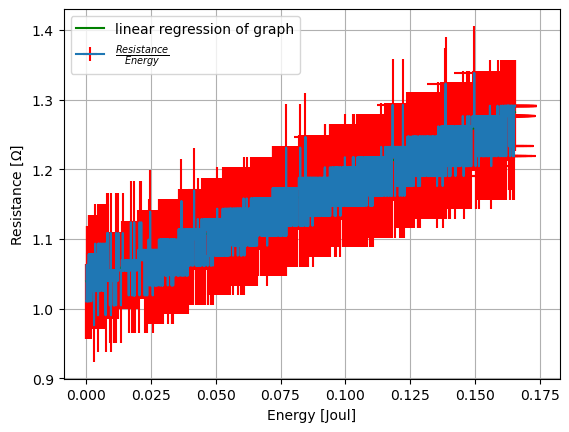

1.4670313989743495
6.896424193160313e-06
######################### 
a/c
From Graph: 9.733937637839267e-06
From Literature: 1.042960415273399e-05 
#########################

######################### 
R
From Graph: 1.0393811023283224
From measurement: 0.934 
#########################


In [131]:
### Measurement of R1
print("##### R1 #####")

t, Vx, Vy = importData("Measurements//R1.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "co")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")


# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()


print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Cu / intercept}\nFrom Literature: {alpha_lit_Cu/hc_lit_Cu}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {R_1}", "\n#########################")


##### R3 #####


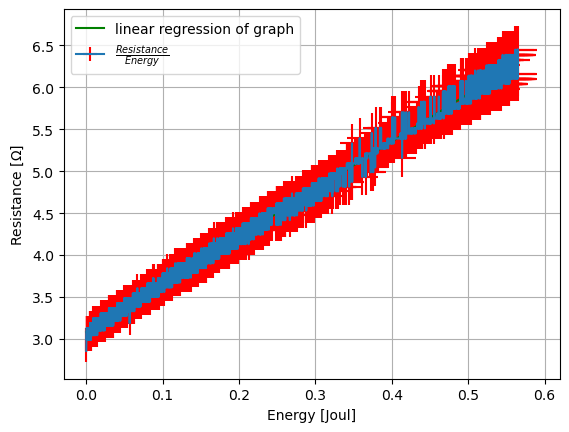

######################### 
a/c
From Graph: 1.4498525439423654e-05
From Literature: 1.6520775840744772e-05 
#########################

######################### 
R
From Graph: 3.081312570311484
From measurement: 2.626 
#########################


In [134]:
### Measurement of R3
print("##### R3 #####")

t, Vx, Vy = importData("Measurements//R3.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "mo")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")

# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()

print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Mo / intercept}\nFrom Literature: {alpha_lit_Mo/hc_lit_Mo}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {R_3}", "\n#########################")


##### R1_R2_Parallel #####


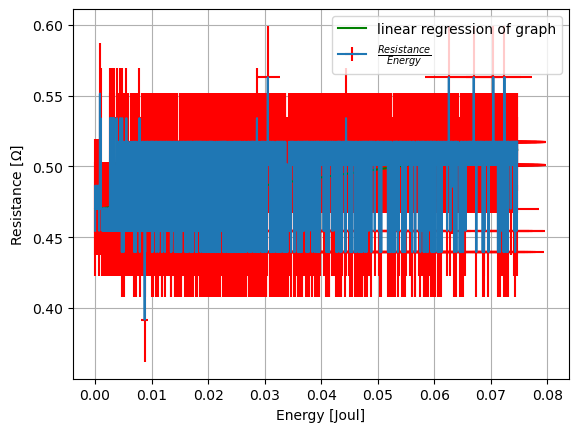

######################### 
a/c
From Graph: 8.267501833917223e-06
From Literature: 1.042960415273399e-05 
#########################

######################### 
R
From Graph: 0.46972352840754455
From measurement: 0.4712116710875332 
#########################


In [141]:
### Measurement of R1_R2_Parallel
print("##### R1_R2_Parallel #####")

t, Vx, Vy = importData("Measurements//R1_R2_Parallel.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "co")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")


# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()


print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Cu / intercept}\nFrom Literature: {alpha_lit_Cu/hc_lit_Cu}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {1 / ((1 / R_1) + (1 / R_2))}", "\n#########################")


##### R1_R2_Queue #####


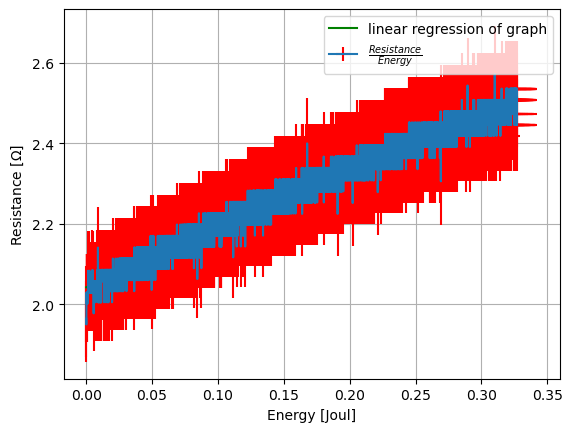

######################### 
a/c
From Graph: 4.8796868228570626e-06
From Literature: 1.042960415273399e-05 
#########################

######################### 
R
From Graph: 2.0426650118166014
From measurement: 1.885 
#########################


In [137]:
### Measurement of R1_R2_Queue
print("##### R1_R2_Queue #####")

t, Vx, Vy = importData("Measurements//R1_R2_Queue.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "co")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")


# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()


print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Cu / intercept}\nFrom Literature: {alpha_lit_Cu/hc_lit_Cu}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {R_1 + R_2}", "\n#########################")

##### R3_R4_Parallel #####


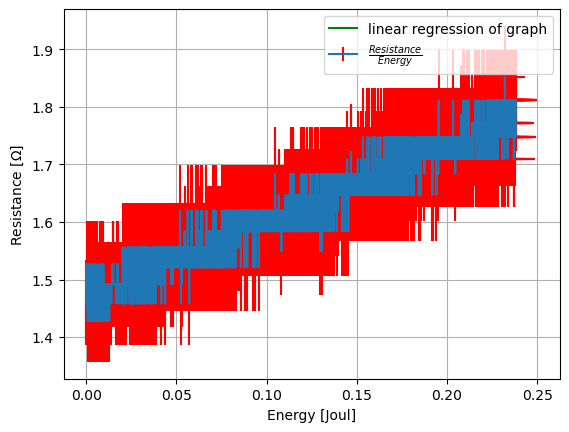

######################### 
a/c
From Graph: 6.954487391694058e-06
From Literature: 1.6520775840744772e-05 
#########################

######################### 
R
From Graph: 1.467881168012509
From measurement: 1.3258725490196077 
#########################


In [140]:
### Measurement of R3_R4_Parallel
print("##### R3_R4_Parallel #####")

t, Vx, Vy = importData("Measurements//R3_R4_Parallel.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "mo")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")


# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()


print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Mo / intercept}\nFrom Literature: {alpha_lit_Mo/hc_lit_Mo}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {1 / ((1 / R_3) + (1 / R_4))}", "\n#########################")


##### R3_R4_Queue #####


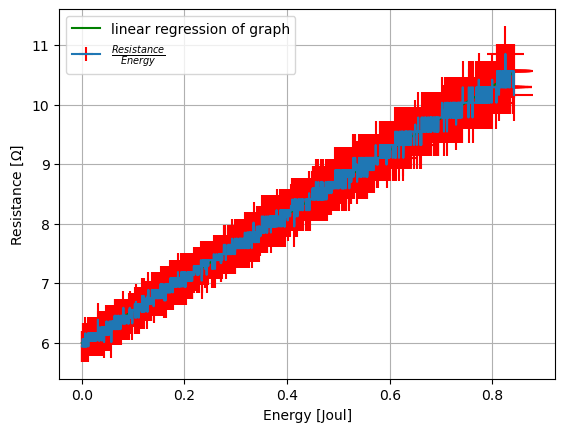

######################### 
a/c
From Graph: 7.078031405715077e-06
From Literature: 1.6520775840744772e-05 
#########################

######################### 
R
From Graph: 5.994416571658585
From measurement: 5.304 
#########################


In [142]:
### Measurement of R3_R4_Queue
print("##### R3_R4_Queue #####")

t, Vx, Vy = importData("Measurements//R3_R4_Queue.CSV")
I, V, R, E = IVRE(t, Vx, Vy, "mo")

plt.figure()

# Resistance as a function of energy
plt.errorbar(x=E["value"], y=R["value"], xerr=E["error"], yerr=R["error"], ecolor='r', label="$\\frac{Resistance}{Energy}$")


plt.xlabel("Energy [Joul]")
plt.ylabel("Resistance [$\\Omega$]")


# Linear Regression of graph
fit = linregress(E["value"], R["value"])
slope, intercept = fit.slope, fit.intercept
plt.plot(E["value"], E["value"] * slope + intercept, 'g',  label='linear regression of graph')

plt.grid()
plt.legend()
plt.show()


print("#########################", "\na/c" f"\nFrom Graph: {slope  * mass_Mo / intercept}\nFrom Literature: {alpha_lit_Mo/hc_lit_Mo}", "\n#########################\n")

print("#########################", "\nR" f"\nFrom Graph: {intercept}\nFrom measurement: {R_3 + R_4}", "\n#########################")


<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>